In [1]:
from google.colab import files
uploaded = files.upload()



Saving traffic_accidents.csv to traffic_accidents.csv


Dataset Shape: (209306, 24)


/tmp/ipython-input-3862622713.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col])
/tmp/ipython-input-3862622713.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=weather_col, data=df, order=df[weather_col].value_counts().index, palette="magma")


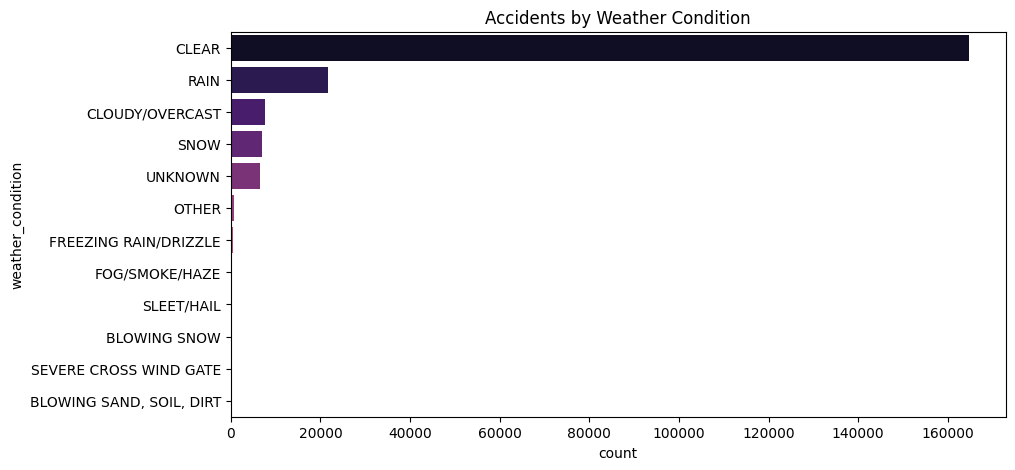

/tmp/ipython-input-3862622713.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=road_col, data=df, order=df[road_col].value_counts().index, palette="coolwarm")


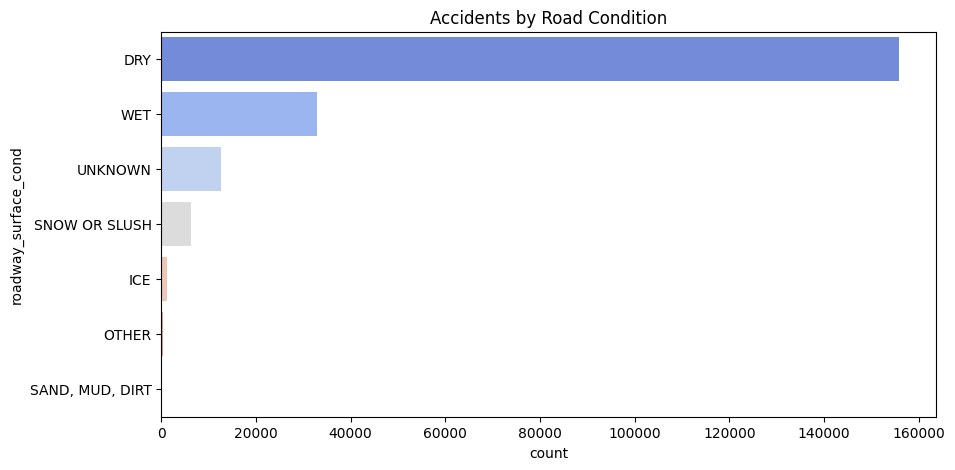

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("traffic_accidents.csv")
print("Dataset Shape:", df.shape)
df.head()


# Handle missing values (drop rows with too many NaNs)
df = df.dropna(thresh=len(df.columns)//2)

# Convert date/time columns if available
for col in df.columns:
    if 'date' in col.lower() or 'time' in col.lower():
        try:
            df[col] = pd.to_datetime(df[col])
        except:
            pass

# Plot accidents by hour of day if time data is available
if any('time' in col.lower() for col in df.columns):
    time_col = [col for col in df.columns if 'time' in col.lower()][0]
    df['hour'] = df[time_col].dt.hour
    plt.figure(figsize=(10,5))
    sns.countplot(x='hour', data=df, palette="viridis")
    plt.title("Accidents by Hour of Day")
    plt.show()

# Accidents by weather condition (if exists)
if any('weather' in col.lower() for col in df.columns):
    weather_col = [col for col in df.columns if 'weather' in col.lower()][0]
    plt.figure(figsize=(10,5))
    sns.countplot(y=weather_col, data=df, order=df[weather_col].value_counts().index, palette="magma")
    plt.title("Accidents by Weather Condition")
    plt.show()

# Accidents by road condition (if exists)
if any('road' in col.lower() for col in df.columns):
    road_col = [col for col in df.columns if 'road' in col.lower()][0]
    plt.figure(figsize=(10,5))
    sns.countplot(y=road_col, data=df, order=df[road_col].value_counts().index, palette="coolwarm")
    plt.title("Accidents by Road Condition")
    plt.show()
